In [56]:
import sys
sys.path.append("..")

In [57]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
paths = list(Path("../outputs/notebooks").glob("**/predictions/loss.csv"))
keys, dfs = [], []
for path in paths:
    dfs.append(pd.read_csv(path))
    keys.append((path.parents[2].stem, path.parents[1].stem))

loss_df = pd.concat(dfs, names=["model", "equivalence"], keys=keys)
loss_df

loss     idx  class class_label
model   equivalence                                                          
w2v2_32 phoneme_within_word_prefix 0     -0.416982  355349      8           S
                                   1     -8.455282   92269     17           L
                                   2      0.058428  351879     10           T
                                   3     19.838142  422598     17           L
                                   4     19.448260   58513      7           K
...                                            ...     ...    ...         ...
w2v2_8  random                     9995  -2.161540  674505     16          ER
                                   9996   6.663965   28721      6          AH
                                   9997  -2.036301  517792      8           S
                                   9998  -1.943934  531192     28          OW
                                   9999  10.414271  142544     27           P

[60000 rows x 4 columns]

<Axes: xlabel='class_label', ylabel='loss'>

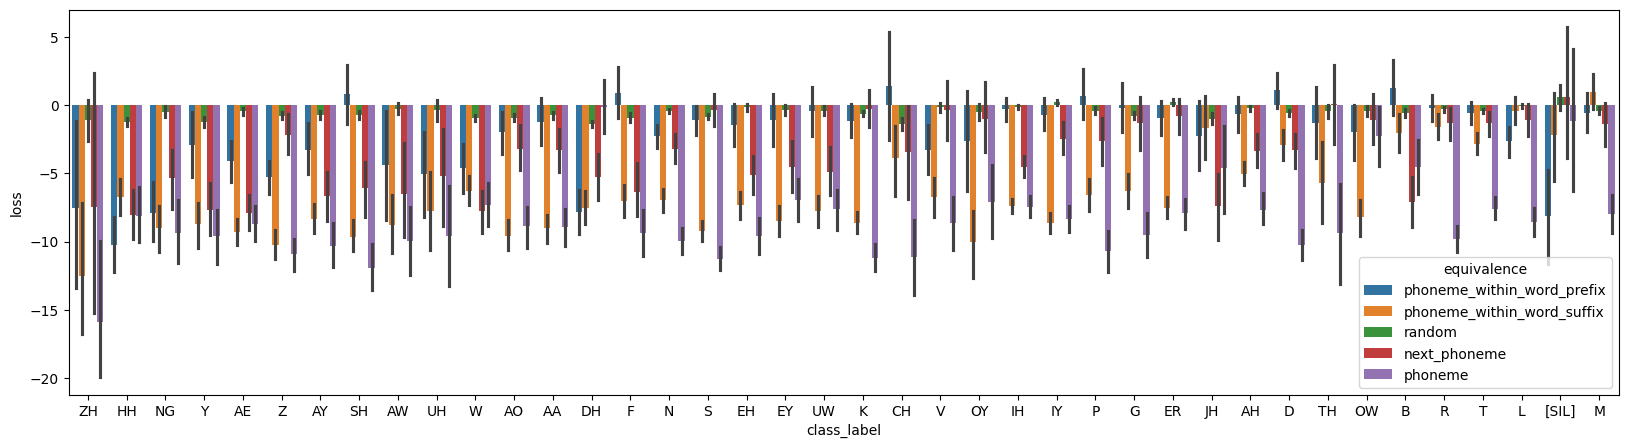

In [61]:
sort_order = loss_df.groupby("class_label")["loss"].mean().sort_values().index

f, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=loss_df.reset_index(), x="class_label", y="loss", hue="equivalence", order=sort_order, ax=ax)

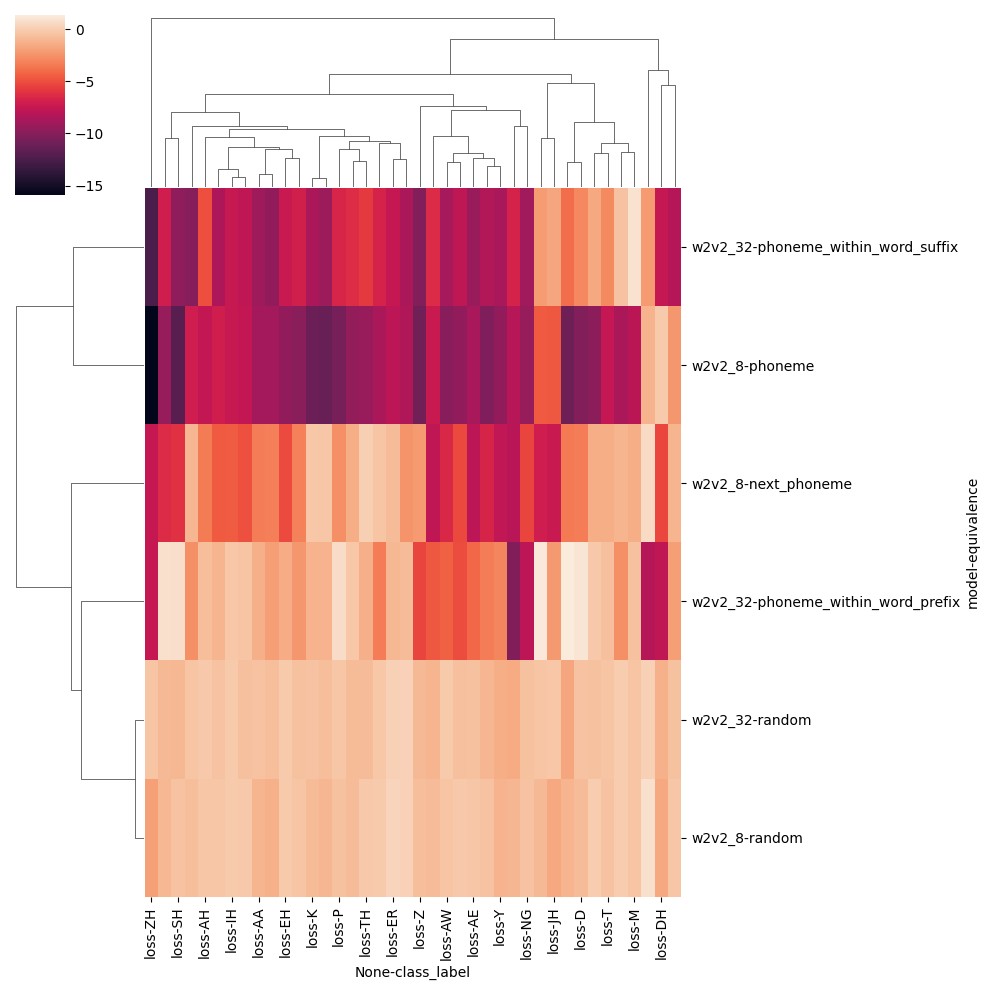

In [66]:
sns.clustermap(loss_df.groupby(["model", "equivalence", "class_label"]).loss.mean().reset_index() \
    .pivot(index=["model", "equivalence"], columns=["class_label"]))

<Axes: xlabel='phoneme_within_word_prefix', ylabel='phoneme'>

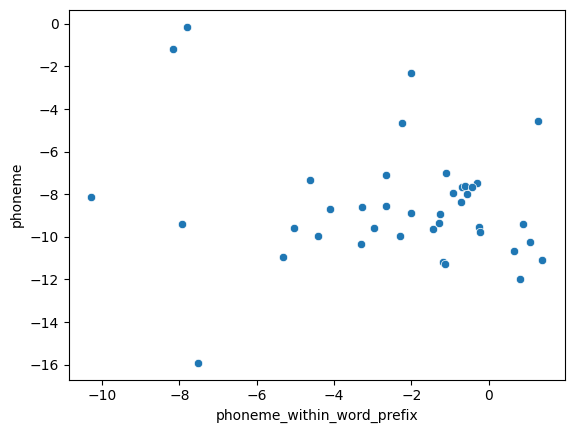

In [87]:
compare_pair = ["phoneme_within_word_prefix", "phoneme"]
paired_df = loss_df.loc[(slice(None), compare_pair), :].groupby(["equivalence", "class_label"]).loss.mean().reset_index() \
    .pivot(index=["class_label"], columns=["equivalence"], values=["loss"])
paired_df.columns = paired_df.columns.droplevel(0)
sns.scatterplot(data=paired_df, x=compare_pair[0], y=compare_pair[1])

<Axes: xlabel='phoneme_within_word_suffix', ylabel='next_phoneme'>

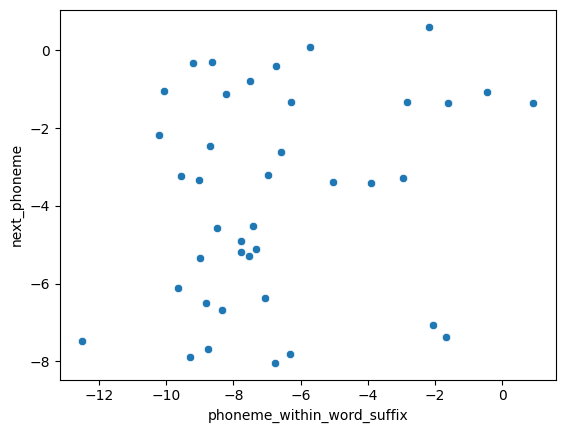

In [88]:
compare_pair = ["phoneme_within_word_suffix", "next_phoneme"]
paired_df = loss_df.loc[(slice(None), compare_pair), :].groupby(["equivalence", "class_label"]).mean().reset_index() \
    .pivot(index=["class_label"], columns=["equivalence"], values=["loss"])
paired_df.columns = paired_df.columns.droplevel(0)
sns.scatterplot(data=paired_df, x=compare_pair[0], y=compare_pair[1])